<a href="https://colab.research.google.com/github/autoshi02/Simulation-and-Modeling-Lab/blob/main/SIM_LAB_TEST/Lab_test_Autoshi_1081_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Compute the mean, variance, and standard deviation of daily customer arrivals.**

In [10]:
# Customer data
customer_id = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
daily_arrivals = np.array([8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10])

# Compute basic statistics
mean_arrivals = np.mean(daily_arrivals)
variance_arrivals_sample = np.var(daily_arrivals, ddof=1) # Sample variance
variance_arrivals_population = np.var(daily_arrivals) # Population variance
std_dev_arrivals_sample = np.std(daily_arrivals, ddof=1) # Sample standard deviation
std_dev_arrivals_population = np.std(daily_arrivals) # Population standard deviation


# Display results
print("Mean daily arrivals:", mean_arrivals)
print("Sample variance of daily arrivals:", variance_arrivals_sample)
print("Population variance of daily arrivals:", variance_arrivals_population)
print("Sample standard deviation of daily arrivals:", std_dev_arrivals_sample)
print("Population standard deviation of daily arrivals:", std_dev_arrivals_population)

Mean daily arrivals: 11.45
Sample variance of daily arrivals: 6.681578947368419
Population variance of daily arrivals: 6.347499999999998
Sample standard deviation of daily arrivals: 2.5848750351551657
Population standard deviation of daily arrivals: 2.519424537468824


**Compare population variance vs. sample variance and explain the difference.**

## Population vs. Sample Variance

- **Population Variance**: This measures the spread of data points in an entire population. It uses the actual mean of the population in its calculation.

- **Sample Variance**: This measures the spread of data points in a sample taken from a population. Since the true population mean is usually unknown, the sample mean is used as an estimate. To account for this estimation and provide a less biased estimate of the population variance, the denominator in the sample variance calculation uses `n-1` (where `n` is the sample size) instead of `n`, which is used for population variance. This is known as Bessel's correction.

In NumPy, `np.var()` by default calculates the population variance. To calculate the sample variance, you need to set the `ddof` parameter (delta degrees of freedom) to 1, as shown in the code. The sample standard deviation also uses `ddof=1` for the same reason.

**Assume customer arrivals follow a uniform distribution. Generate a simulated dataset of 30 days Plot both the real and simulated data in side-by-side histograms for comparison.**

In [11]:
# Real customer arrival data
real_arrivals = [8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10]

# Simulate for 30 days
num_simulated_days = 30

# Assume the range of arrivals is from the minimum to maximum of the real data
min_arrival = min(real_arrivals)
max_arrival = max(real_arrivals)

# Generate simulated customer arrivals following a uniform distribution
# We use randint to generate integers within the observed range [min_arrival, max_arrival]
simulated_arrivals = np.random.randint(min_arrival, max_arrival + 1, num_simulated_days)

print("Real Arrivals:", real_arrivals)
print("Simulated Arrivals:", list(simulated_arrivals)) # Convert to list for cleaner printing

Real Arrivals: [8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10]
Simulated Arrivals: [np.int64(8), np.int64(11), np.int64(13), np.int64(12), np.int64(14), np.int64(16), np.int64(14), np.int64(13), np.int64(16), np.int64(7), np.int64(14), np.int64(14), np.int64(7), np.int64(8), np.int64(9), np.int64(12), np.int64(9), np.int64(8), np.int64(10), np.int64(12), np.int64(9), np.int64(10), np.int64(8), np.int64(7), np.int64(7), np.int64(9), np.int64(16), np.int64(9), np.int64(13), np.int64(11)]


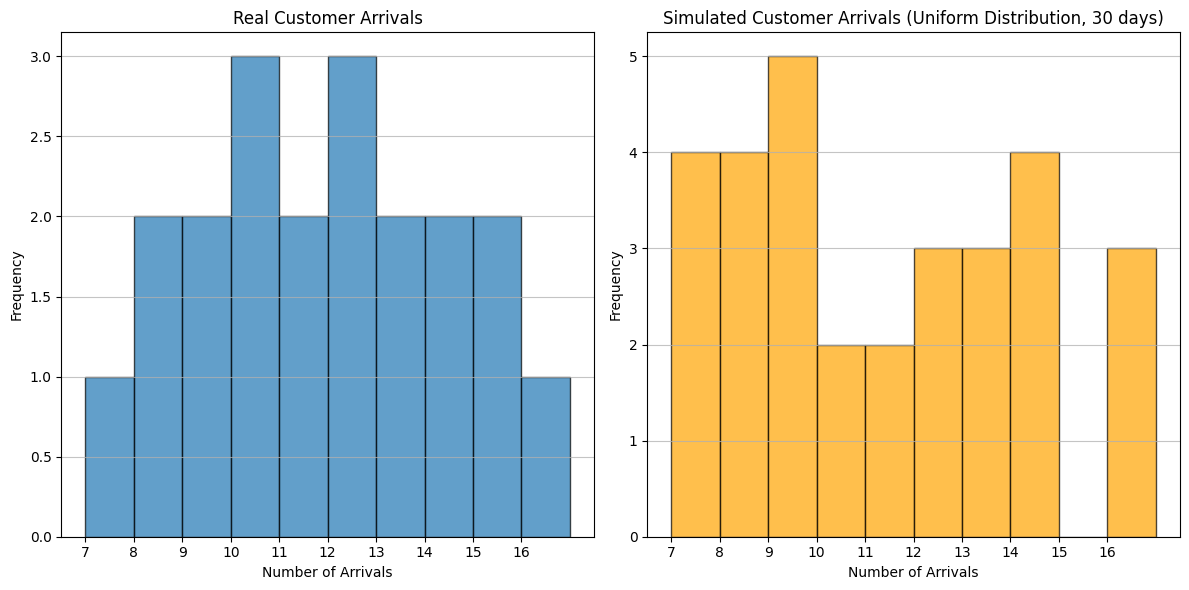

In [12]:
# Plotting side-by-side histograms
plt.figure(figsize=(12, 6))

# Histogram for real data
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(real_arrivals, bins=range(min(real_arrivals), max(real_arrivals) + 2), edgecolor='black', alpha=0.7)
plt.title('Real Customer Arrivals')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.xticks(range(min(real_arrivals), max(real_arrivals) + 1))
plt.grid(axis='y', alpha=0.75)


# Histogram for simulated data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(simulated_arrivals, bins=range(min(real_arrivals), max(real_arrivals) + 2), edgecolor='black', alpha=0.7, color='orange')
plt.title(f'Simulated Customer Arrivals (Uniform Distribution, {num_simulated_days} days)')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.xticks(range(min(real_arrivals), max(real_arrivals) + 1))
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Using Monte Carlo simulation, estimate the probability that more than 15 customers arrive on a given day. Use 100,000 simulated samples from the uniform distribution.**


In [13]:
# Number of simulation samples
num_simulations = 100000

# Generate simulated customer arrivals using the uniform distribution
# We use the previously determined range [min_arrival, max_arrival]
simulated_arrivals_mc = np.random.randint(min_arrival, max_arrival + 1, num_simulations)

# Count the number of simulated days with more than 15 arrivals
successful_outcomes = np.sum(simulated_arrivals_mc > 15)

# Estimate the probability
estimated_probability = successful_outcomes / num_simulations

print(f"Number of simulations: {num_simulations}")
print(f"Number of simulated days with more than 15 arrivals: {successful_outcomes}")
print(f"Estimated probability of more than 15 arrivals: {estimated_probability}")

Number of simulations: 100000
Number of simulated days with more than 15 arrivals: 9847
Estimated probability of more than 15 arrivals: 0.09847


**1.Calculate your unique hypothesized mean for the t-test using your Student ID**

**2.Test the null hypothesis: “The mean daily customer arrival is equal to your personalized hypothesized mean.” Use a one-sample t-test and report the t-statistic, p-value, and conclusion.**


In [14]:
# Step 1: Define the dataset (observed sample)
data = np.array([8,12,10,15,9,13,11,14,7,16,10,12,9,15,11,13,14,8,12,10])  # Daily customer arrivals

# Step 2: Define the population mean (hypothesized mean)
# last 3 digits of my Student ID
student_id_last_3_digits = 81
population_mean = (student_id_last_3_digits % 10) + 10
print(f'Student ID last 3 digits: {student_id_last_3_digits}')
print(f'Calculated Hypothesized Mean: {population_mean:.2f}')

# Step 3: Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, population_mean)
#$ci = stats.t.interval(0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

# Step 4: Display the results
print(f'Sample Mean: {np.mean(data):.2f}')
print(f'Hypothesized Population Mean: {population_mean:.2f}')
print(f't-Statistic: {t_statistic:.2f}')
print(f'Degrees of Freedom: {len(data) - 1}')
print(f'p-Value: {p_value:.4f}')
#print(f'Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]')

Student ID last 3 digits: 81
Calculated Hypothesized Mean: 11.00
Sample Mean: 11.45
Hypothesized Population Mean: 11.00
t-Statistic: 0.78
Degrees of Freedom: 19
p-Value: 0.4458


In [15]:
# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. The average daily customer arrival is significantly different from {population_mean:.2f}.')
else:
    print(f'Fail to reject the null hypothesis. The average daily customer arrival is not significantly different from {population_mean:.2f}.')

Fail to reject the null hypothesis. The average daily customer arrival is not significantly different from 11.00.


**Include a visualization comparing your sample mean and hypothesized mean.**

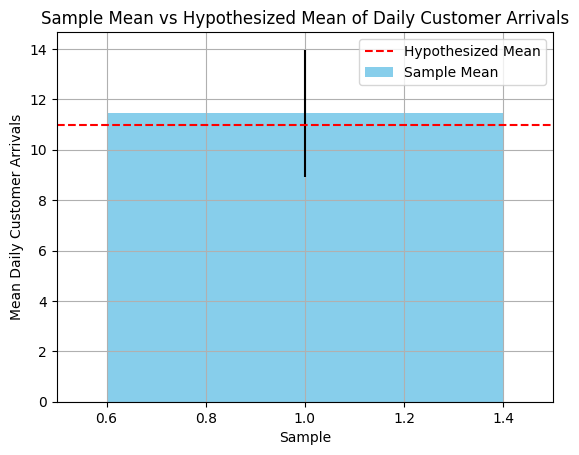

In [16]:
# Visualize the data
plt.figure()
plt.bar(1, np.mean(data), color="skyblue", label='Sample Mean')
plt.errorbar(1, np.mean(data), yerr=np.std(data), fmt='k', linewidth=1.5)
plt.axhline(y=population_mean, color='r', linestyle='--', linewidth=1.5, label='Hypothesized Mean')
plt.title('Sample Mean vs Hypothesized Mean of Daily Customer Arrivals')
plt.xlim(0.5,1.5)
plt.xlabel('Sample')
plt.ylabel('Mean Daily Customer Arrivals')
plt.legend()
plt.grid(True)
plt.show()

**Provide your unique interpretation of the result in context.**

**Interpretation of Results:**

The one-sample t-test resulted in a p-value of  pvalue:.4f , which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis.

This indicates that there is no statistically significant evidence to conclude that the average daily customer arrival is different from your hypothesized mean of  populationmean:.2f .